<a href="https://colab.research.google.com/github/stav-aizik/AI-PROJECT/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries and download data


In [187]:
#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


In [188]:
#download data(tesla) from yahoo Finance
tsla = yf.download("TSLA",start="2022-07-01",end="2023-07-01")

[*********************100%***********************]  1 of 1 completed


In [189]:
tsla.columns = [col[0] for col in tsla.columns]

In [190]:
tsla

,Close,High,Low,Open,Volume
Date,,,,,
2022-07-01,227.263336,230.229996,222.119995,227.000000,74460300
2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100
2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600
2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600
2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200
...,...,...,...,...,...
2023-06-26,241.050003,258.369995,240.699997,250.070007,179990600
2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200
2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800


In [191]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-01 to 2023-06-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Open    251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


#Statistical Data

In [192]:
#describe
tsla.describe()

,Close,High,Low,Open,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,211.215976,215.969721,206.114900,211.138260,1.225730e+08
std,51.796179,52.493955,51.133946,51.788649,4.996973e+07
min,108.099998,111.750000,101.809998,103.000000,4.186470e+07
25%,178.474998,182.419998,172.504997,176.635002,8.141040e+07
50%,197.580002,203.000000,192.889999,198.539993,1.163124e+08
75%,250.486671,257.934998,244.036667,250.295006,1.591312e+08
max,309.320007,314.666656,305.579987,311.666656,3.065906e+08


statistical by months:

In [193]:
tsla['month']=tsla.index.to_period('M')

In [194]:
group_month = tsla.groupby('month')

In [195]:
group_month.mean()

,Close,High,Low,Open,Volume
month,,,,,
2022-07,251.394666,255.841666,243.754666,248.886668,8.724420e+07
2022-08,294.869857,301.852028,290.238551,297.223042,7.370710e+07
2022-09,288.734763,294.027140,282.823809,287.885710,6.187005e+07
2022-10,223.810477,229.788573,217.481905,224.126190,8.263158e+07
2022-11,191.246666,197.352381,186.915238,193.479049,8.977501e+07
2022-12,152.970476,158.921428,150.161429,155.897143,1.402023e+08
2023-01,134.195999,137.242999,128.430500,132.316000,1.948750e+08
2023-02,199.775264,204.234737,193.332105,198.178420,1.907813e+08
2023-03,188.522609,192.462608,184.242608,188.425218,1.439835e+08


In [196]:
group_month.describe()

Close                                                             \
        count        mean        std         min         25%         50%   
month                                                                      
2022-07  20.0  251.394666  19.678442  227.263336  236.365829  245.036667   
2022-08  23.0  294.869857   9.581290  275.609985  288.130005  296.453339   
2022-09  21.0  288.734763  14.185170  265.250000  276.010010  288.589996   
2022-10  21.0  223.810477  11.287726  204.990005  217.240005  222.419998   
2022-11  21.0  191.246666  15.048549  167.869995  182.860001  190.720001   
2022-12  21.0  152.970476  26.916506  109.099998  125.349998  156.800003   
2023-01  20.0  134.195999  21.124977  108.099998  119.539997  127.974998   
2023-02  19.0  199.775264   8.123897  181.410004  195.784996  200.860001   
2023-03  23.0  188.522609   9.031799  172.919998  182.625000  190.410004   
2023-04  19.0  176.955262  12.843392  153.750000  163.650002  184.309998   
2023-05  22.0  175.799090  12.782245  160.309998  166.885002  171.934998   
2023-06  21.0  246.090476  18.824589  207.520004  234.860001  255.899994   

                                 High              ...        Open  \
                75%         max count        mean  ...         75%   
month                                              ...               
2022-07  269.251656  297.149994  20.0  255.841666  ...  264.485832   
2022-08  301.728333  309.320007  23.0  301.852028  ...  302.514999   
2022-09  302.609985  309.070007  21.0  294.027140  ...  299.859985   
2022-10  227.539993  249.440002  21.0  229.788573  ...  229.770004   
2022-11  195.970001  227.820007  21.0  197.352381  ...  195.880005   
2022-12  174.039993  194.860001  21.0  158.921428  ...  175.029999   
2023-01  144.024998  177.899994  20.0  137.242999  ...  142.182503   
2023-02  206.515007  214.240005  19.0  204.234737  ...  204.450005   
2023-03  193.845001  207.460007  23.0  192.462608  ...  195.029999   
2023-04  185.709999  194.770004  19.0  180.473684  ...  186.919998   
2023-05  184.077499  203.929993  22.0  178.618637  ...  181.847496   
2023-06  258.709991  274.450012  21.0  250.310477  ...  258.920013   

                    Volume                                           \
                max  count          mean           std          min   
month                                                                 
2022-07  280.700012   20.0  8.724420e+07  1.724209e+07   64073400.0   
2022-08  311.666656   23.0  7.370710e+07  2.127902e+07   41864700.0   
2022-09  308.290009   21.0  6.187005e+07  9.703479e+06   48674600.0   
2022-10  254.500000   21.0  8.263158e+07  1.590500e+07   61554300.0   
2022-11  234.050003   21.0  8.977501e+07  2.436951e+07   50672700.0   
2022-12  197.080002   21.0  1.402023e+08  4.769832e+07   73645900.0   
2023-01  178.050003   20.0  1.948750e+08  3.691213e+07  138858100.0   
2023-02  211.759995   19.0  1.907813e+08  2.770500e+07  142228100.0   
2023-03  206.210007   23.0  1.439835e+08  2.343484e+07   98654600.0   
2023-04  199.910004   19.0  1.318514e+08  2.661474e+07   92067000.0   
2023-05  200.100006   22.0  1.219089e+08  2.160359e+07   88965000.0   
2023-06  275.130005   21.0  1.638323e+08  2.145427e+07  112267600.0   

                                                             
                 25%          50%          75%          max  
month                                                        
2022-07   77533125.0   84652050.0   95973375.0  142032300.0  
2022-08   56503550.0   70155000.0   88747800.0  117042900.0  
2022-09   54338100.0   61642800.0   67726600.0   87087800.0  
2022-10   69152400.0   79428800.0   94124500.0  117798100.0  
2022-11   66567600.0   92226600.0  109186400.0  132703000.0  
2022-12   97624500.0  139390600.0  166989700.0  221923300.0  
2023-01  170069150.0  188380500.0  207567175.0  306590600.0  
2023-02  176247050.0  186188100.0  214618850.0  232662000.0  
2023-03  125880050.0  145995600.0  155523050.0  191488900.0  
2023-0

In [197]:
Close = group_month.describe()['Close'][['max','min','mean']]

<function matplotlib.pyplot.show(close=None, block=None)>

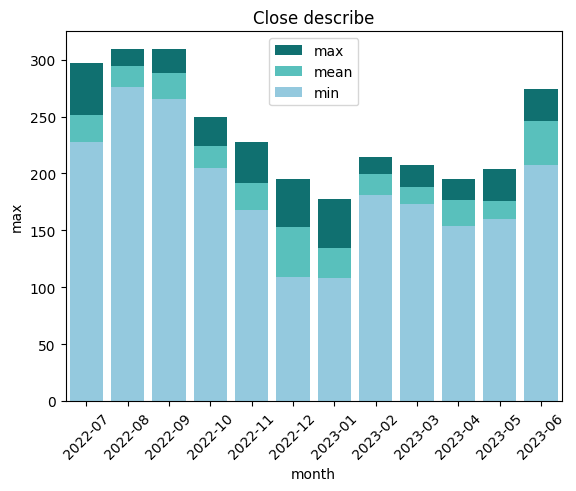

In [198]:
#close describe
plt.title('Close describe')
sns.barplot(x='month',y='max' , data = Close , color= 'teal',label = 'max')
sns.barplot(x='month',y='mean' , data = Close, color= 'mediumturquoise',label = 'mean')
sns.barplot(x='month',y='min' , data = Close , color= 'skyblue',label = 'min')
plt.xticks(rotation=45)
plt.show

In [199]:
Volume = group_month.describe()['Volume'][['max','min','mean']]

<function matplotlib.pyplot.show(close=None, block=None)>

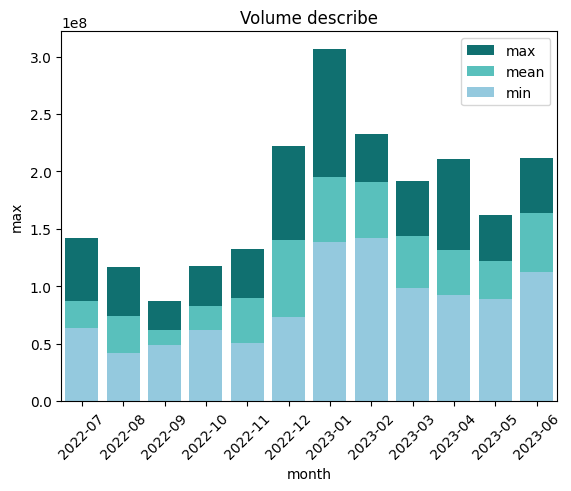

In [200]:
plt.title('Volume describe')
sns.barplot(x='month',y='max' , data = Volume , color= 'teal',label = 'max')
sns.barplot(x='month',y='mean' , data = Volume, color= 'mediumturquoise',label = 'mean')
sns.barplot(x='month',y='min' , data = Volume , color= 'skyblue',label = 'min')
plt.xticks(rotation=45)
plt.show

statistical by day of week:

In [201]:
tsla['day of week']=tsla.index.day_of_week

In [202]:
group_day=tsla.groupby('day of week')

In [203]:
tsla.head(1)

,Close,High,Low,Open,Volume,month,day of week
Date,,,,,,,
2022-07-01,227.263336,230.229996,222.119995,227.0,74460300,2022-07,4


In [204]:
group_day.describe()

Close                                                             \
            count        mean        std         min         25%         50%   
day of week                                                                    
0            44.0  212.813561  49.243820  119.769997  180.457497  194.764999   
1            52.0  209.774104  52.618777  108.099998  178.170006  197.474998   
2            52.0  210.252499  53.311669  112.709999  179.734997  201.074997   
3            51.0  211.307778  53.436359  110.339996  175.165001  202.039993   
4            52.0  212.179487  51.865976  113.059998  179.860004  201.389999   

                                     High              ...        Open  \
                    75%         max count        mean  ...         75%   
day of week                                            ...               
0            241.387501  309.320007  44.0  218.429697  ...  250.578339   
1            249.632504  308.730011  52.0  214.590450  ...  246.380001   
2            249.684998  307.396667  52.0  214.751666  ...  247.512505   
3            256.699997  308.633331  51.0  215.469149  ...  249.584999   
4            257.585007  303.350006  52.0  216.976475  ...  259.012512   

                        Volume                                          \
                    max  count          mean           std         min   
day of week                                                              
0            301.786682   44.0  1.167499e+08  4.475583e+07  41864700.0   
1            311.666656   52.0  1.213498e+08  4.729055e+07  50541800.0   
2            308.290009   52.0  1.251000e+08  4.910598e+07  50028900.0   
3            311.000000   51.0  1.234629e+08  5.365443e+07  47500500.0   
4            302.670013   52.0  1.253237e+08  5.509312e+07  50672700.0   

                                                                
                    25%          50%          75%          max  
day of week                                                     
0            91509750.0  109404750.0  144200425.0  230878800.0  
1            84275100.0  112674700.0  158915150.0  231402800.0  
2            83182725.0  125603150.0  157582300.0  221070500.0  
3            78089000.0  117798100.0  162330450.0  234815100.0  
4            78755125.0  113788250.0  162578375.0  306590600.0  

[5 rows x 40 columns]

In [205]:
Close_day = group_day.describe()['Close'][['max','min','mean']]

In [206]:
Close_day

,max,min,mean
day of week,,,
0,309.320007,119.769997,212.813561
1,308.730011,108.099998,209.774104
2,307.396667,112.709999,210.252499
3,308.633331,110.339996,211.307778
4,303.350006,113.059998,212.179487


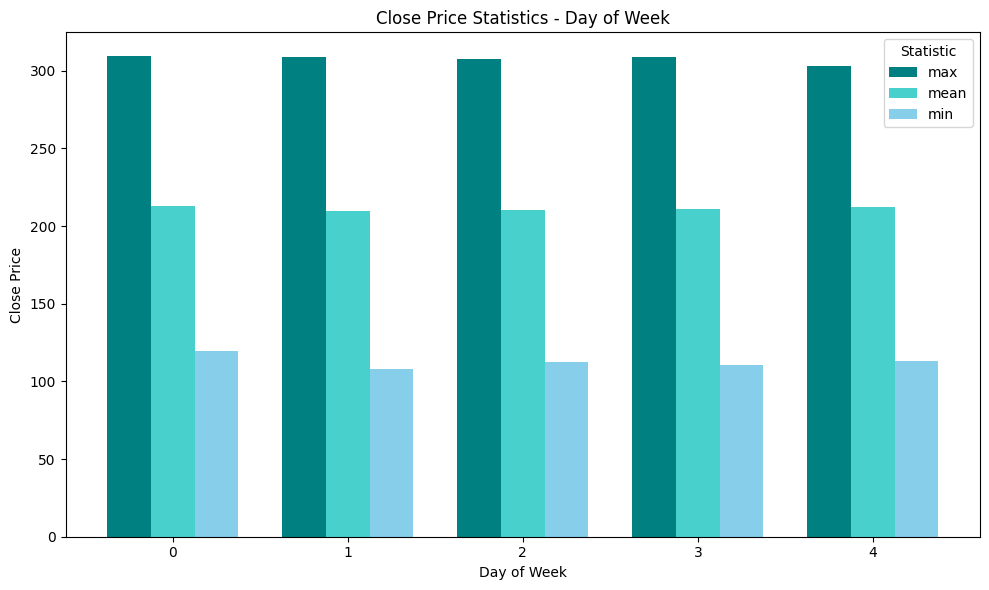

In [207]:
days = Close_day.index
max_values = Close_day['max']
mean_values = Close_day['mean']
min_values = Close_day['min']

x = np.arange(len(days))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, max_values, width, label='max', color='teal')
plt.bar(x, mean_values, width, label='mean', color='mediumturquoise')
plt.bar(x + width, min_values, width, label='min', color='skyblue')

plt.title('Close Price Statistics - Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Close Price')
plt.legend(title='Statistic')

plt.tight_layout()
plt.show()


heatmap:

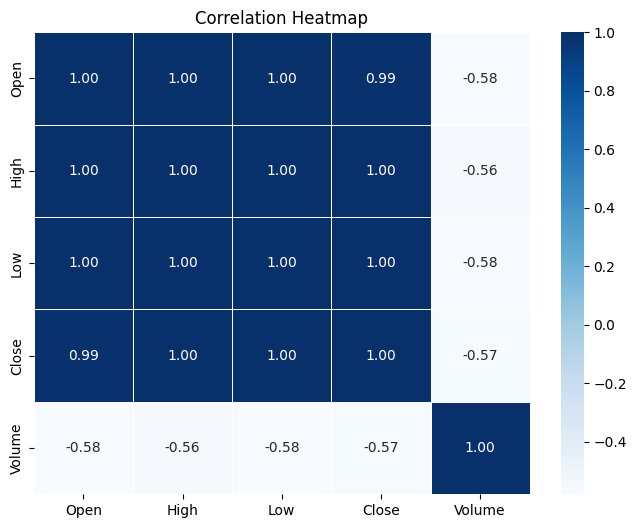

In [208]:
#correlation matrix
correlation_matrix = tsla[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

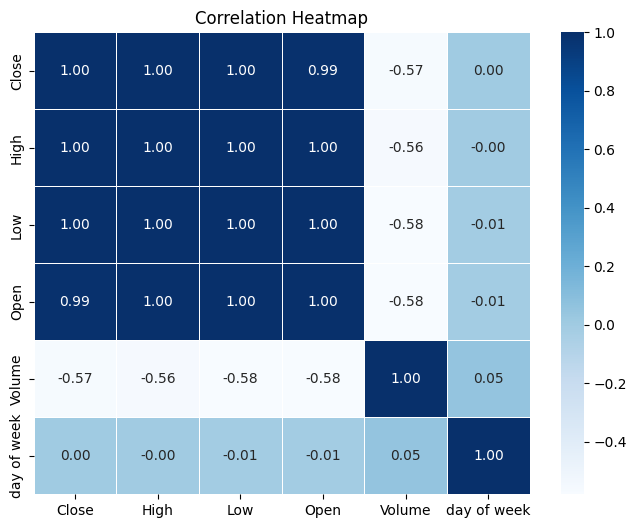

In [209]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Close', ylabel='High'>

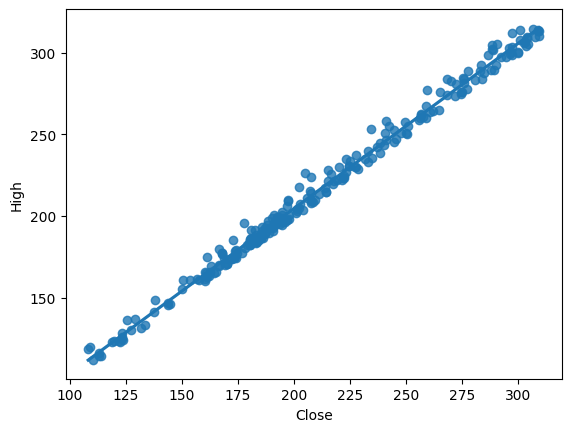

In [210]:
sns.regplot(x='Close' , y='High' , data = tsla)

<Axes: xlabel='Close', ylabel='Open'>

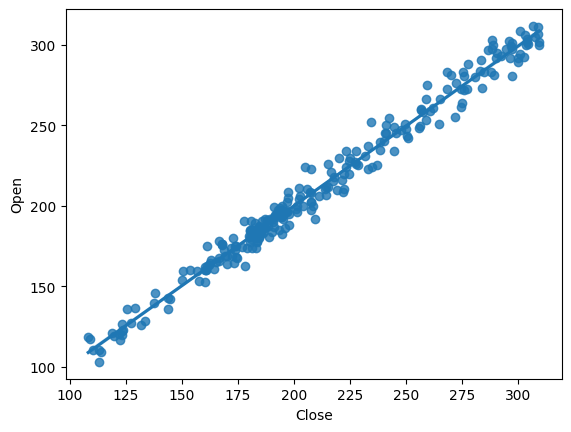

In [211]:
sns.regplot(x='Close' , y='Open' , data = tsla)

In [212]:
# נוודא שהאינדקס הוא מסוג datetime
tsla.index = pd.to_datetime(tsla.index)

# יוצרים עמודת רבעון לפי האינדקס
tsla['Quarter'] = tsla.index.to_period('Q')

# לוקחים את השורה הראשונה מכל רבעון לפי האינדקס
quarter_start = tsla.groupby('Quarter').head(1)

# מציגים את התוצאה
quarter_start[['Open', 'High', 'Low', 'Close', 'Volume']]


,Open,High,Low,Close,Volume
Date,,,,,
2022-07-01,227.000000,230.229996,222.119995,227.263336,74460300
2022-10-03,254.500000,255.160004,241.009995,242.399994,98363500
2023-01-03,118.470001,118.800003,104.639999,108.099998,231402800
2023-04-03,199.910004,202.690002,192.199997,194.770004,169545900


In [213]:
quarter_start

,Close,High,Low,Open,Volume,month,day of week,Quarter
Date,,,,,,,,
2022-07-01,227.263336,230.229996,222.119995,227.000000,74460300,2022-07,4,2022Q3
2022-10-03,242.399994,255.160004,241.009995,254.500000,98363500,2022-10,0,2022Q4
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800,2023-01,1,2023Q1
2023-04-03,194.770004,202.690002,192.199997,199.910004,169545900,2023-04,0,2023Q2


In [214]:
volum_quarter = quarter_start.Volume

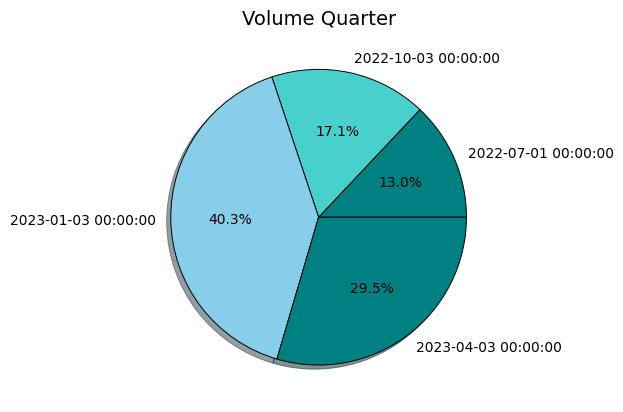

In [215]:
plt.title('Volume Quarter', fontsize=14)
plt.pie(volum_quarter,labels = volum_quarter.index,
        wedgeprops = {'edgecolor' :'k',
                      'linewidth': 0.7} ,
        shadow = True ,
        colors = ['teal', 'mediumturquoise', 'skyblue'],
       autopct='%1.1f%%',
        )

plt.show()


In [216]:
max_date=tsla['Close'].idxmax()
min_date=tsla['Close'].idxmin()
highlight_dates = [tsla['Close'].idxmax(),tsla['Close'].idxmin()]
highlight_values = tsla.loc[highlight_dates, 'Close']

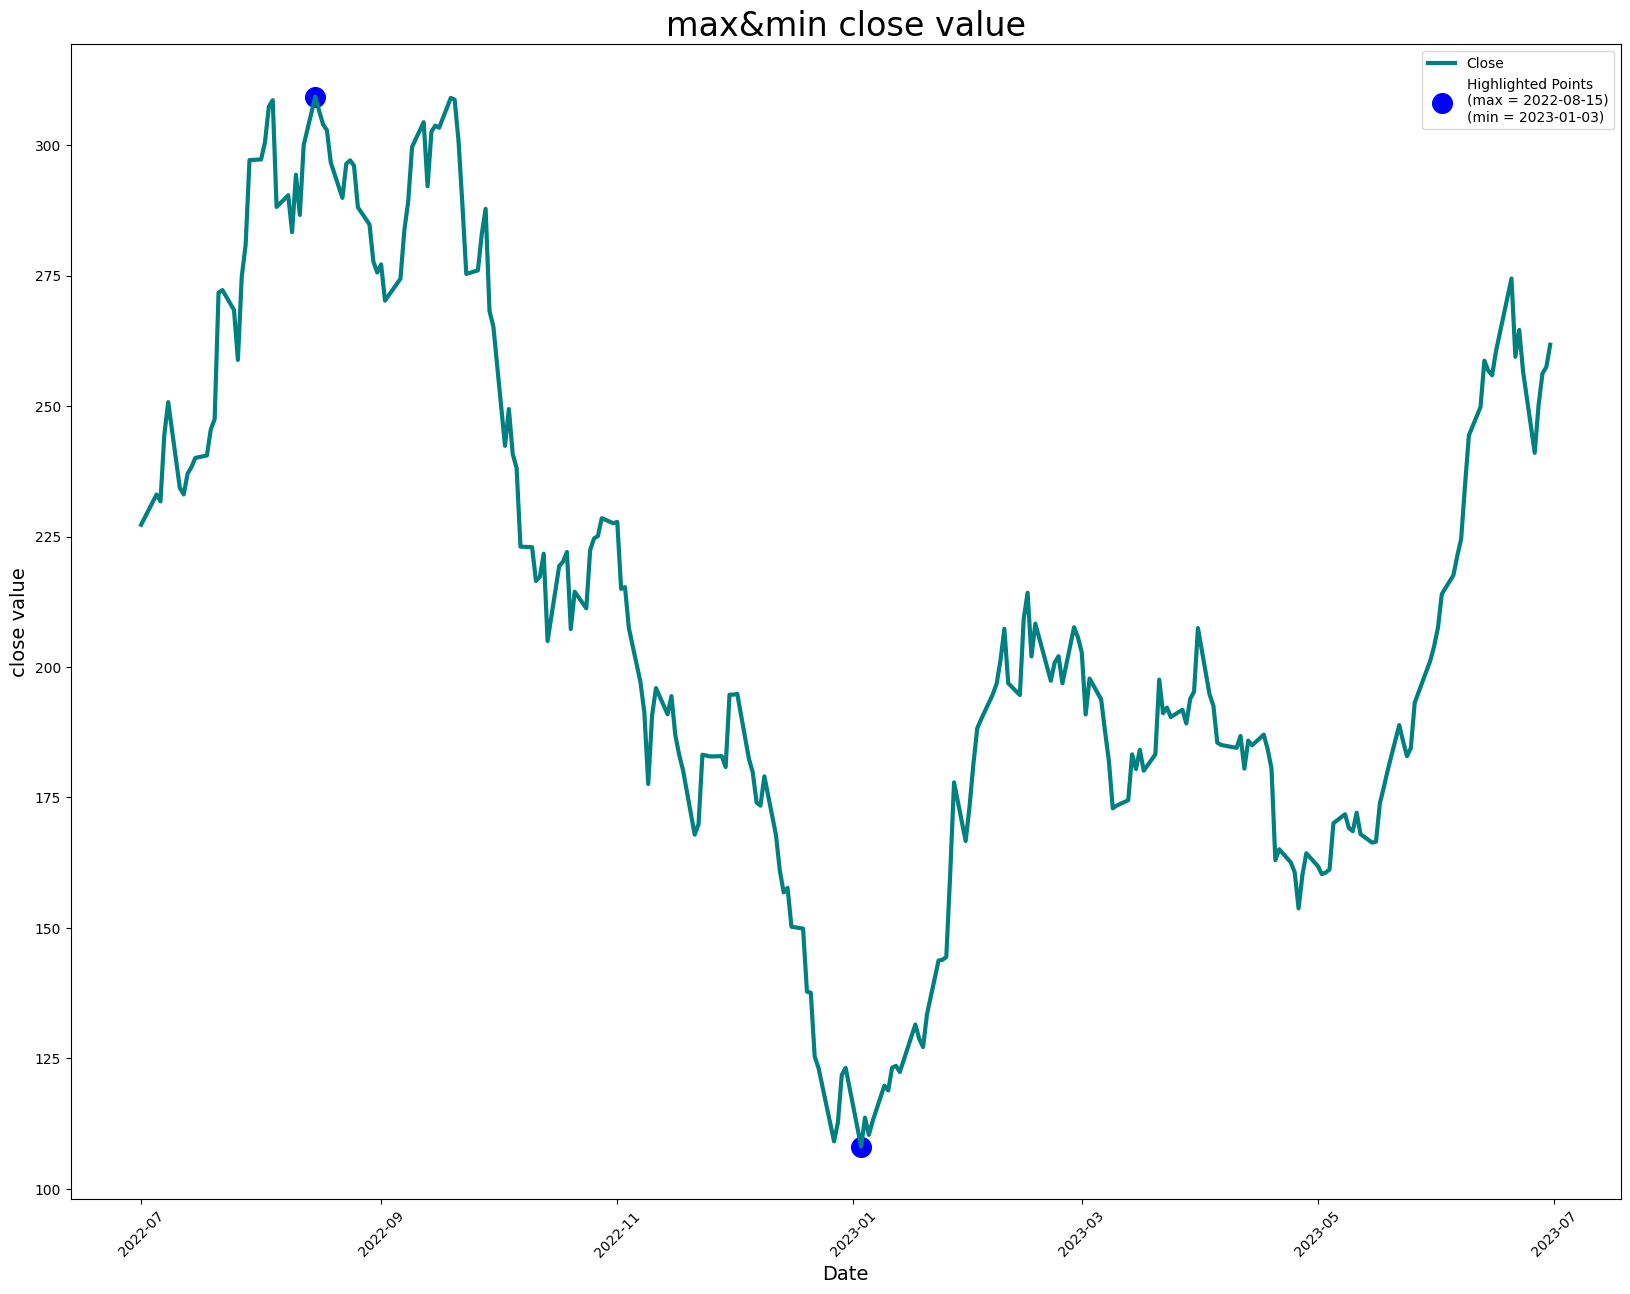

In [217]:
#
plt.subplots(figsize=(20,15))
plt.title('max&min close value',fontsize=24)
sns.lineplot(x='Date',y='Close' , data = tsla , linewidth=3, color= 'teal',label = 'Close')
plt.xlabel('Date',fontsize=14)
plt.ylabel('close value',fontsize=14)
plt.xticks(rotation=45)

plt.scatter(highlight_dates, highlight_values, color='blue', s=200,
            label=f'Highlighted Points\n(max = {max_date.date()})\n(min = {min_date.date()})')
plt.legend()
plt.show()

In [218]:
group_day.describe()['Close'][['mean']]

,mean
day of week,
0,212.813561
1,209.774104
2,210.252499
3,211.307778
4,212.179487


In [219]:
close_d_mean = group_day.describe()['Close'][['mean']]

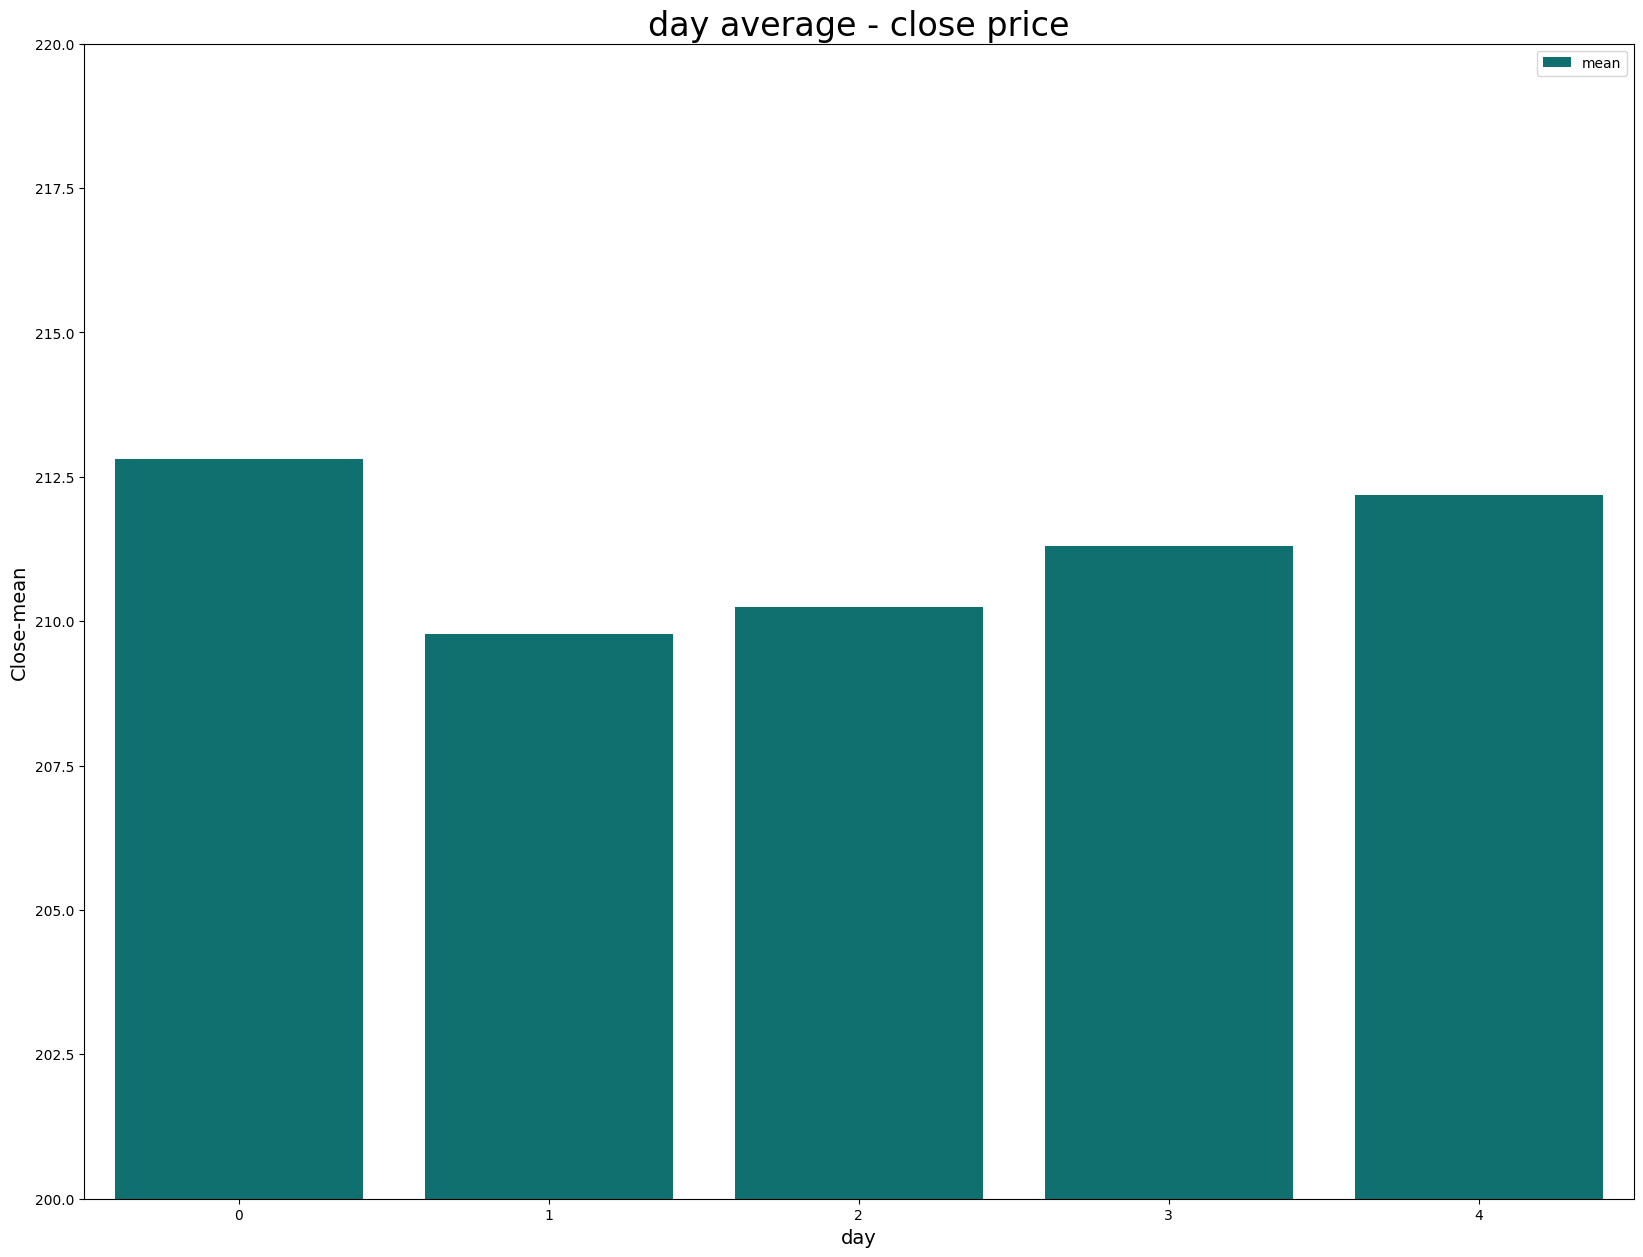

In [220]:
plt.subplots(figsize=(20,15))
plt.title('day average - close price',fontsize=24)
sns.barplot(x='day of week',y='mean' , data = close_d_mean , color= 'teal',label = 'mean')
plt.ylim(200,220)
plt.xlabel('day',fontsize=14)
plt.ylabel('Close-mean',fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [221]:
close_m_mean = group_month.describe()['Close'][['mean']]

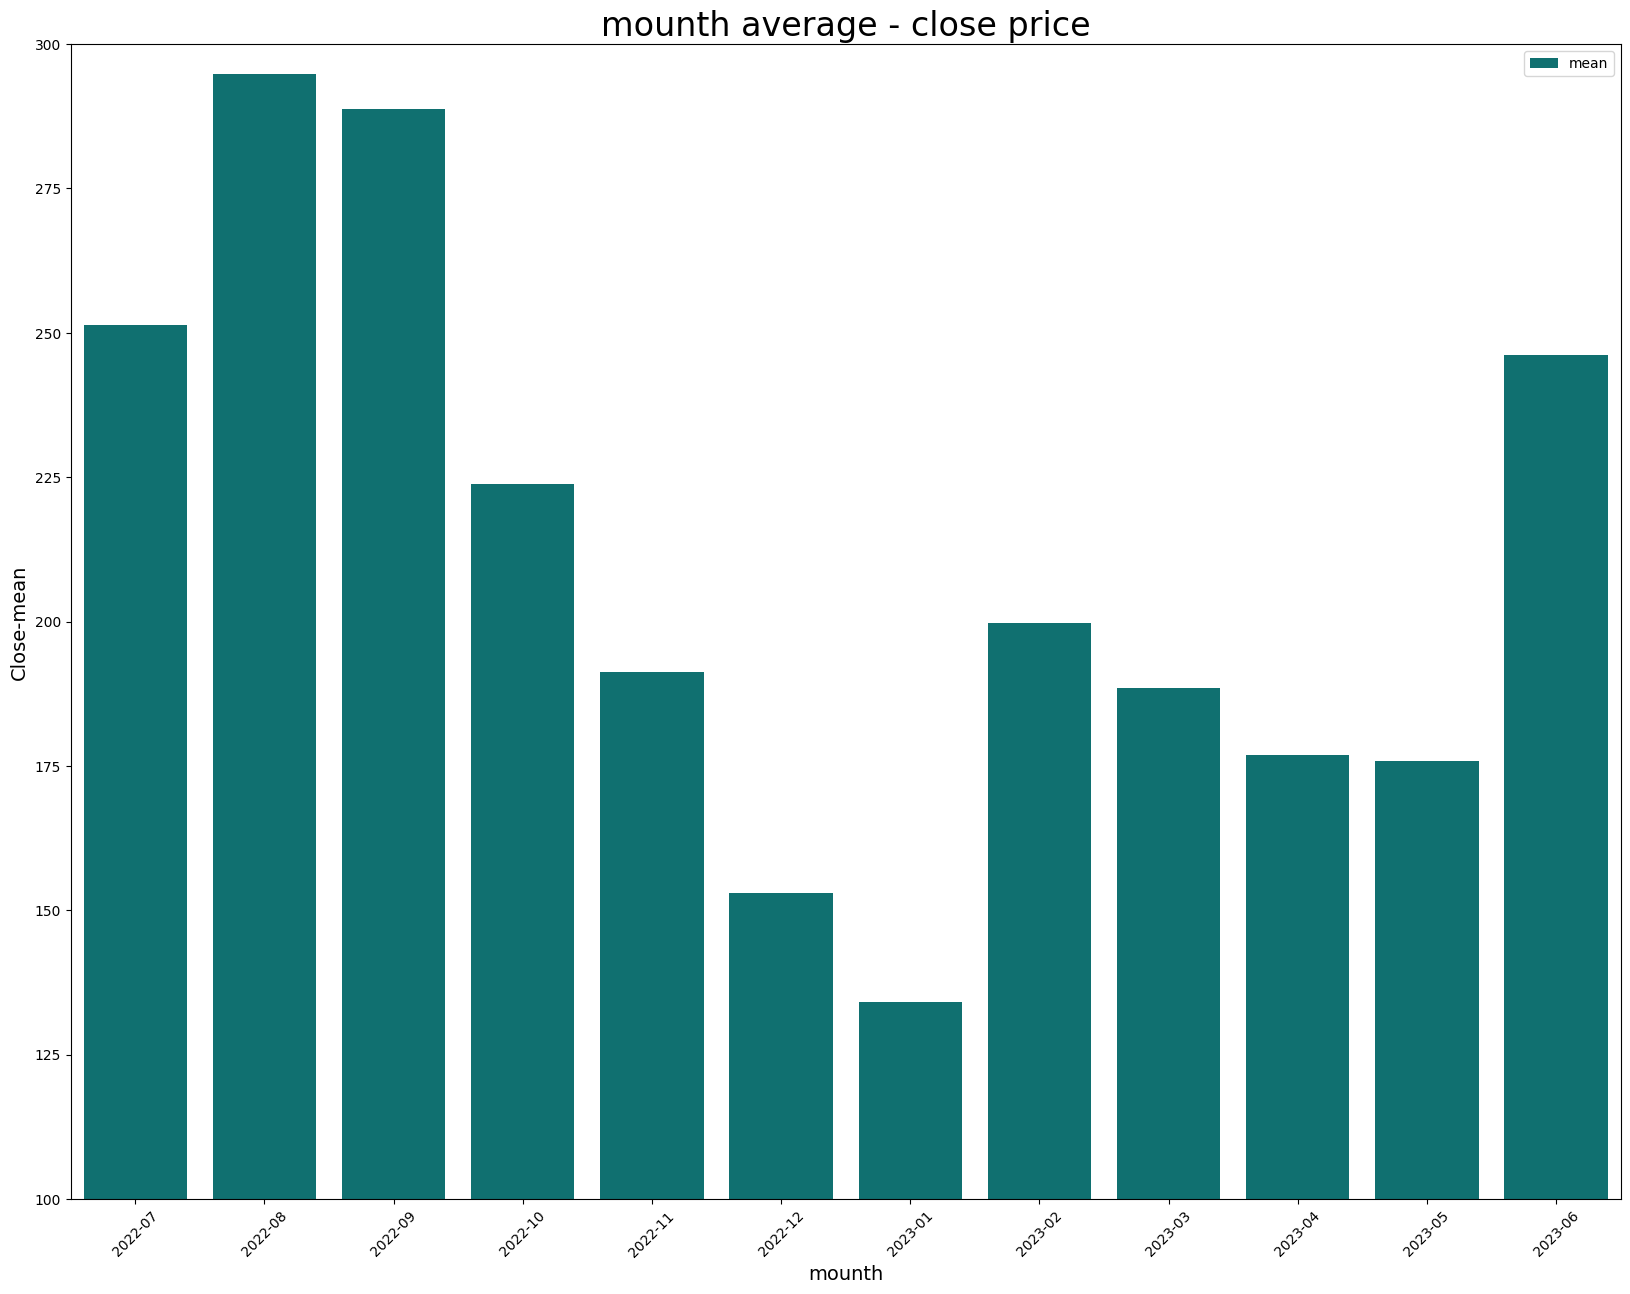

In [222]:
plt.subplots(figsize=(20,15))
plt.title('mounth average - close price',fontsize=24)
sns.barplot(x='month',y='mean' , data = close_m_mean , color= 'teal',label = 'mean')
plt.ylim(100,300)
plt.xlabel('mounth',fontsize=14)
plt.ylabel('Close-mean',fontsize=14)
plt.xticks(rotation=45)
plt.show()

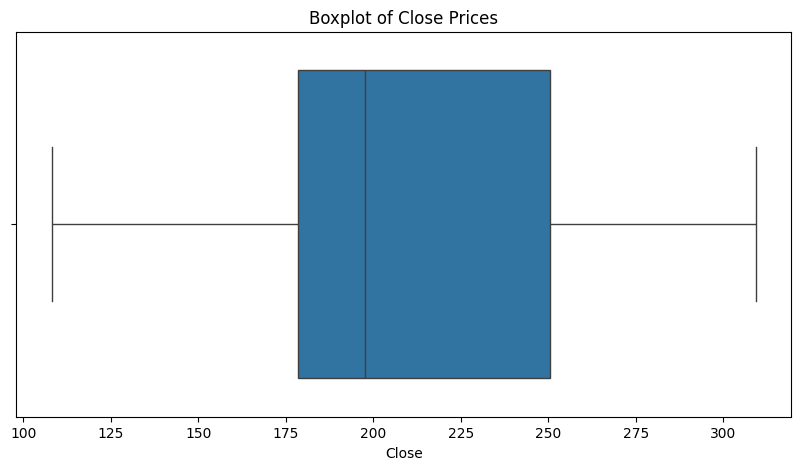

In [223]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=tsla['Close'])
plt.title("Boxplot of Close Prices")
plt.show()

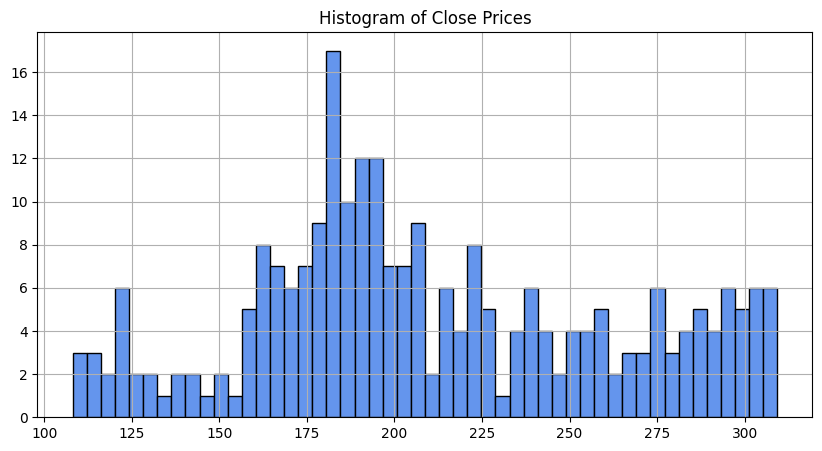

In [224]:
tsla['Close'].hist(bins=50,color='cornflowerblue', edgecolor='black', figsize=(10, 5))
plt.title("Histogram of Close Prices")
plt.show()

In [225]:
Q1 = tsla['Close'].quantile(0.25)
Q3 = tsla['Close'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = tsla[(tsla['Close'] < lower_bound) | (tsla['Close'] > upper_bound)]
print(outliers_iqr[['Close']])

Empty DataFrame
Columns: [Close]
Index: []


#classic models

In [226]:
tsla.drop(['month','day of week','Quarter'],axis=1,inplace=True)

In [230]:
pd.concat([tsla["Close"],
           tsla["Close"].shift(-1),
           tsla["Close"].shift(+1)],
          keys = ["Close","tmw", "yesteday"], axis =1).head()

,Close,tmw,yesteday
Date,,,
2022-07-01,227.263336,233.066666,NaN
2022-07-05,233.066666,231.733337,227.263336
2022-07-06,231.733337,244.543335,233.066666
2022-07-07,244.543335,250.763336,231.733337
2022-07-08,250.763336,234.343338,244.543335


In [231]:
#calculating the daily change
tsla["Change"] = (tsla["Close"].shift(-1)- tsla["Close"])

In [232]:
tsla.loc[tsla["Change"] >0, "label"]= 1
tsla.loc[tsla["Change"] <0, "label"]= -1


In [237]:
tsla

,Close,High,Low,Open,Volume,Change,label
Date,,,,,,,
2022-07-01,227.263336,230.229996,222.119995,227.000000,74460300,5.803329,1.0
2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100,-1.333328,-1.0
2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600,12.809998,1.0
2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600,6.220001,1.0
2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200,-16.419998,-1.0
...,...,...,...,...,...,...,...
2023-06-23,256.600006,262.450012,252.800003,259.290009,176584100,-15.550003,-1.0
2023-06-26,241.050003,258.369995,240.699997,250.070007,179990600,9.160004,1.0
2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200,6.029984,1.0


In [236]:
tsla = tsla.dropna(subset=['label'])

In [248]:
#Defining features , target & train , test
split_index = int(len(tsla) * 0.8)
train = tsla.iloc[:split_index]
test = tsla.iloc[split_index:]
features=['Close','High','Low','Open','Volume']
target = 'label'

In [249]:
#split train & test
X_train=train[features]
X_test=test[features]
y_train=train[target]
y_test=test[target]

In [250]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [251]:
#Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [252]:

# Initialize results list
results = []

# Loop over models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)

    # Append to results list
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Confusion Matrix": conf
    })

In [254]:
results_df = pd.DataFrame(results).drop(columns=['Confusion Matrix'])
results_df.sort_values(by='F1-score', ascending=False)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.62,0.694444,0.757576,0.724638
2,Decision Tree,0.56,0.648649,0.727273,0.685714
1,Random Forest,0.38,0.545455,0.363636,0.436364
3,SVM,0.44,0.666667,0.303030,0.416667
4,KNN,0.38,0.625000,0.151515,0.243902


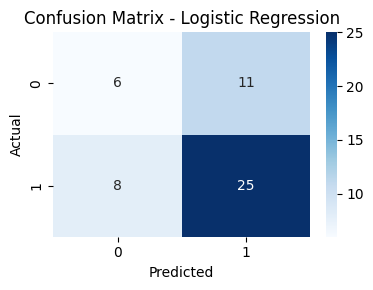

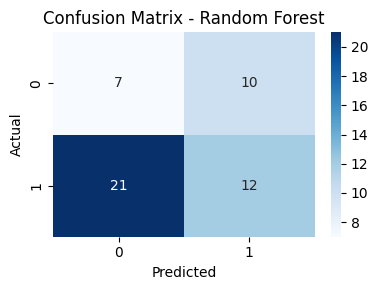

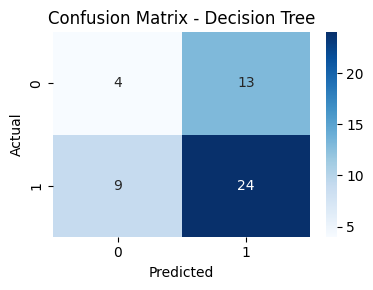

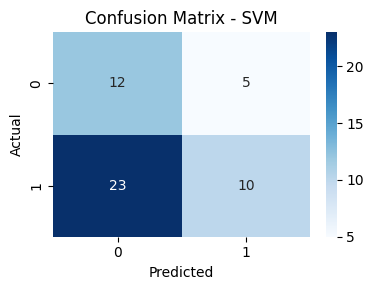

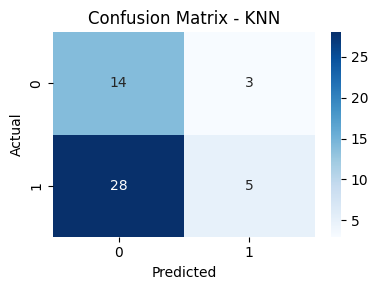

In [255]:
for result in results:
    plt.figure(figsize=(4,3))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {result['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()